In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [388]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F6F2-81C8

 Directory of C:\Users\DELL\OneDrive\Desktop\codesoft

08-08-2024  16:45    <DIR>          .
08-08-2024  16:45    <DIR>          ..
08-08-2024  10:21    <DIR>          .ipynb_checkpoints
07-08-2024  23:19            22,564 archive.zip
07-08-2024  23:13         1,096,203 DATA SCIENCE (3).pdf
08-08-2024  16:45           185,378 Titanic_Survival_Prediction.ipynb
08-08-2024  16:02            61,194 Titanic-Dataset.csv
               4 File(s)      1,365,339 bytes
               3 Dir(s)  20,192,395,264 bytes free


In [394]:
train = pd.read_csv('Titanic-Dataset.csv')

<Axes: >

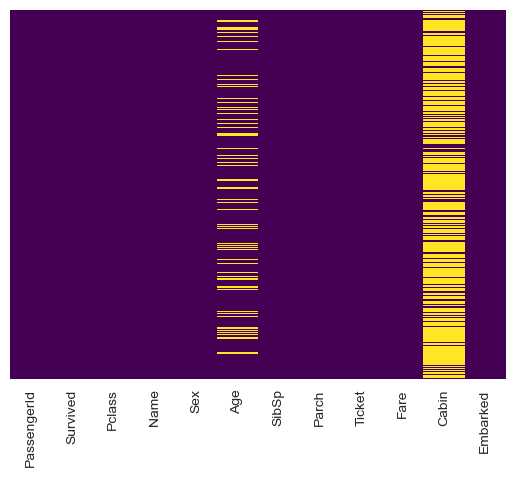

In [396]:
 sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [397]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [398]:
len(train)

891

<Axes: xlabel='Survived', ylabel='count'>

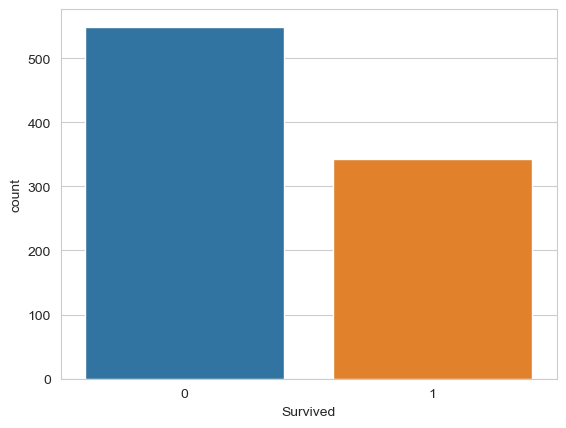

In [399]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived',data = train)

<Axes: xlabel='Survived', ylabel='count'>

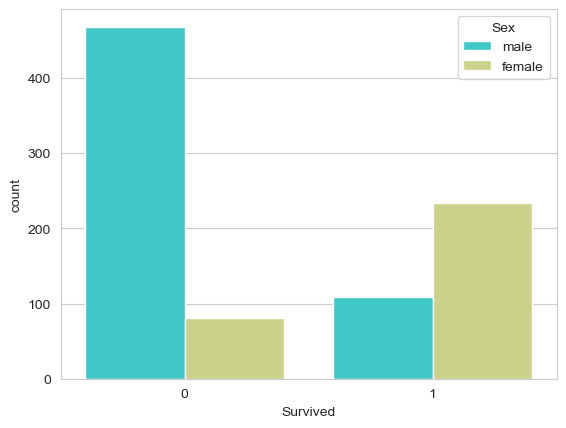

In [401]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived',hue= 'Sex',data = train,palette= 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

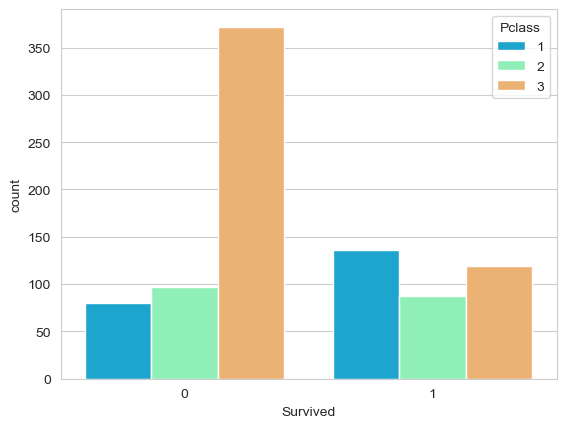

In [404]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = train,palette= 'rainbow')

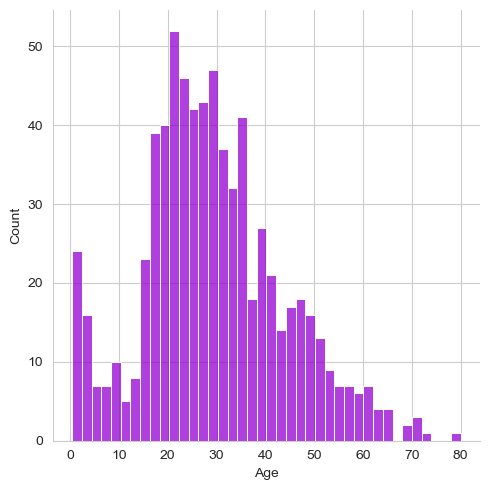

In [405]:
sns.displot(train['Age'].dropna(),kde=False,color='darkviolet',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

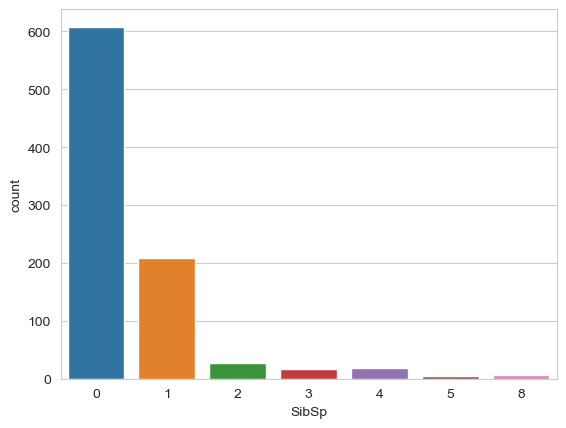

In [406]:
sns.countplot(x='SibSp',data= train)

<Axes: >

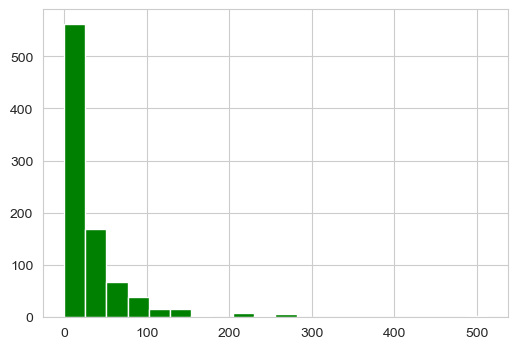

In [408]:
train['Fare'].hist(color='green',bins=20,figsize=(6,4))

<Axes: xlabel='Pclass', ylabel='Age'>

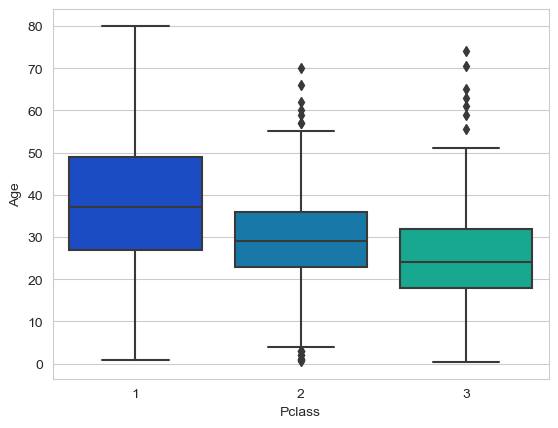

In [409]:
sns.boxplot(x='Pclass',y='Age',data=train,palette="winter")

In [411]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]

    if pd.isnull(Age):

        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [412]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

<Axes: >

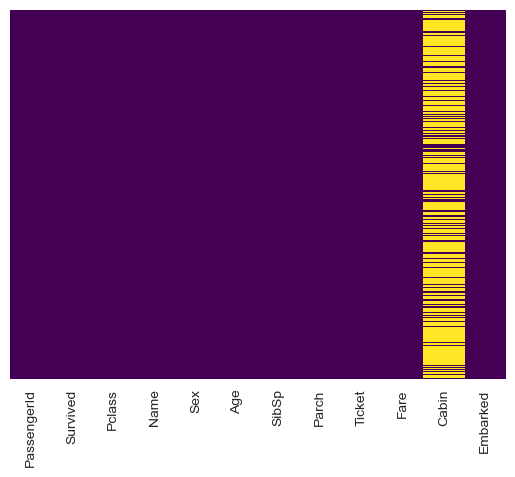

In [413]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [415]:
train.drop('Cabin',axis=1,inplace=True)

In [416]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

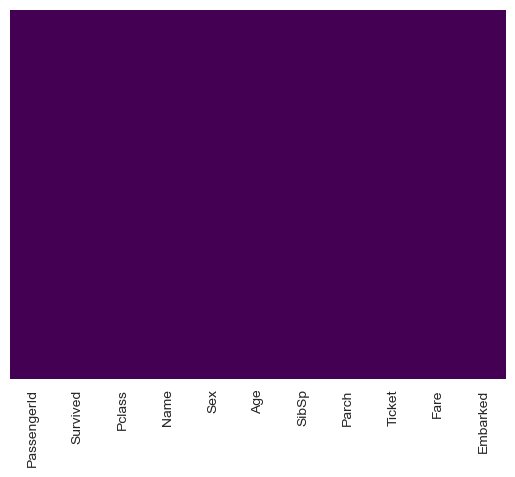

In [417]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [418]:
train.dropna(inplace=True)

In [419]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [420]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)


In [422]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [423]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [425]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [426]:
train = pd.concat([train,embark,sex],axis=1)

In [427]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,1,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,1,0
888,889,0,3,female,24.0,1,2,23.4500,S,0,1,0
889,890,1,1,male,26.0,0,0,30.0000,C,0,0,1


In [429]:
train.drop('Survived',axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,male
0,1,3,male,22.0,1,0,7.2500,S,0,1,1
1,2,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,3,female,26.0,0,0,7.9250,S,0,1,0
3,4,1,female,35.0,1,0,53.1000,S,0,1,0
4,5,3,male,35.0,0,0,8.0500,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,0,1,1
887,888,1,female,19.0,0,0,30.0000,S,0,1,0
888,889,3,female,24.0,1,2,23.4500,S,0,1,0
889,890,1,male,26.0,0,0,30.0000,C,0,0,1


In [461]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [463]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,30.0000,0,1,0
888,0,3,24.0,1,2,23.4500,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [477]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


In [475]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [483]:
from sklearn.model_selection import train_test_split

In [487]:
X_train, X_test, Y_train, Y_test= train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size= 0.30, random_state=101)

In [491]:
from sklearn.linear_model import LogisticRegression

In [521]:
logmodel=LogisticRegression(max_iter=2000)

In [523]:
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [535]:
predictions = logmodel.predict(X_test)

In [537]:
from sklearn.metrics import confusion_matrix

In [539]:
accuracy=confusion_matrix(Y_test,predictions)

In [541]:
accuracy

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [543]:
from sklearn.metrics import accuracy_score

In [547]:
accuracy= accuracy_score(Y_test,predictions)

In [549]:
accuracy

0.8314606741573034

In [551]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)